In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar -xvf spark-3.3.1-bin-hadoop3.tgz
!pip install -q findspark

import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

import findspark

findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

from google.colab import files

uploaded = files.upload()

spark-3.3.1-bin-hadoop3/
spark-3.3.1-bin-hadoop3/LICENSE
spark-3.3.1-bin-hadoop3/NOTICE
spark-3.3.1-bin-hadoop3/R/
spark-3.3.1-bin-hadoop3/R/lib/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/DESCRIPTION
spark-3.3.1-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/Rd.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/features.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/hsearch.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/links.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/nsInfo.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/package.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/Meta/vignette.rds
spark-3.3.1-bin-hadoop3/R/lib/SparkR/NAMESPACE
spark-3.3.1-bin-hadoop3/R/lib/SparkR/R/
spark-3.3.1-bin-hadoop3/R/lib/SparkR/R/SparkR
spark-3.3.1-bin-hadoop3/R/lib/SparkR/R/SparkR.rdb
spark-3.3.1-bin-hadoop3/R/lib/SparkR/R/SparkR.rdx
spark-3.3.1-bin-hadoop3/R/lib/SparkR/doc/
spark-3.3.1-bin-hadoop3/R/lib/Spar

Saving ratings.csv to ratings.csv


In [ ]:
from pyspark.ml.classification import LogisticRegression
spark = SparkSession.builder.appName('recommend-ML').getOrCreate()
df = spark.read.csv('ratings.csv', header = True, inferSchema = True)
cols = df.columns
df.printSchema()

root
 |-- userID: integer (nullable = true)
 |-- trackID: integer (nullable = true)
 |-- result: integer (nullable = true)
 |-- album_score: integer (nullable = true)
 |-- artist_score: integer (nullable = true)
 |-- genre1_score: integer (nullable = true)
 |-- genre2_score: integer (nullable = true)
 |-- genre3_score: integer (nullable = true)
 |-- genre4_score: integer (nullable = true)
 |-- genre5_score: integer (nullable = true)
 |-- genre6_score: integer (nullable = true)
 |-- genre7_score: integer (nullable = true)
 |-- genre8_score: integer (nullable = true)
 |-- genre9_score: integer (nullable = true)
 |-- genre10_score: integer (nullable = true)



In [ ]:
from pyspark.ml.feature import OneHotEncoder,StringIndexer,VectorAssembler

In [ ]:
numericCols = ['album_score', 'artist_score', 'genre1_score', 'genre2_score', 'genre3_score', 'genre4_score', 'genre5_score', 'genre6_score', 'genre7_score', 'genre8_score', 'genre9_score', 'genre10_score']
stages = []
assemblerInputs =  numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [ ]:
label_stringIdx = StringIndexer(inputCol = 'result', outputCol = 'label')# string to index, which translate YES and NO to 1 and 0
stages += [label_stringIdx]

In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- userID: integer (nullable = true)
 |-- trackID: integer (nullable = true)
 |-- result: integer (nullable = true)
 |-- album_score: integer (nullable = true)
 |-- artist_score: integer (nullable = true)
 |-- genre1_score: integer (nullable = true)
 |-- genre2_score: integer (nullable = true)
 |-- genre3_score: integer (nullable = true)
 |-- genre4_score: integer (nullable = true)
 |-- genre5_score: integer (nullable = true)
 |-- genre6_score: integer (nullable = true)
 |-- genre7_score: integer (nullable = true)
 |-- genre8_score: integer (nullable = true)
 |-- genre9_score: integer (nullable = true)
 |-- genre10_score: integer (nullable = true)



In [ ]:
import pandas as pd
pd.DataFrame(df.take(6), columns=df.columns).transpose()

,0,1,2,3,4,5
label,0.0,0.0,1.0,1.0,0.0,1.0
features,"[90.0, 50.0, 90.0, 80.0, -1.0, -1.0, -1.0, -1....","[90.0, -1.0, 90.0, 80.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, 90.0, -1.0, -1.0, -1.0, -1.0, -1....","[90.0, 50.0, 90.0, 80.0, -1.0, -1.0, -1.0, -1....","[-1.0, 90.0, 90.0, 50.0, -1.0, -1.0, -1.0, -1...."
userID,200031,200031,200031,200031,200031,200031
trackID,30877,8244,130183,198762,34503,227283
result,1,1,0,0,1,0
album_score,90,90,-1,-1,90,-1
artist_score,50,-1,-1,-1,50,90
genre1_score,90,90,-1,90,90,90
genre2_score,80,80,-1,-1,80,50
genre3_score,-1,-1,-1,-1,-1,-1


In [ ]:
from pyspark.sql.functions import col
train = df#.where(col("userID").between(200596, 201720))
#test = df.where(col("userID").between(200031, 200563))
print("Training Dataset Count: " + str(train.count()))
#print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 5739


In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=5000)
lrModel = lr.fit(train)

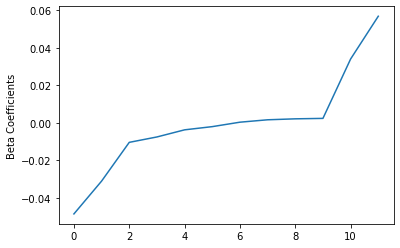

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

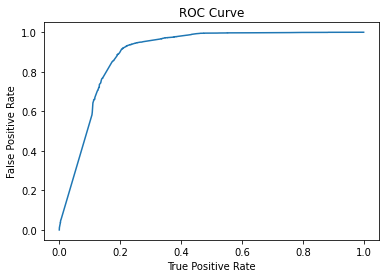

Training set areaUnderROC: 0.8946111442392121


In [ ]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [ ]:
df2 = spark.read.csv('predictions.csv', header = True, inferSchema = True)
cols2 = df2.columns
df2.printSchema()

root
 |-- userID: integer (nullable = true)
 |-- trackID: integer (nullable = true)
 |-- album_score: integer (nullable = true)
 |-- artist_score: integer (nullable = true)
 |-- genre1_score: integer (nullable = true)
 |-- genre2_score: integer (nullable = true)
 |-- genre3_score: integer (nullable = true)
 |-- genre4_score: integer (nullable = true)
 |-- genre5_score: integer (nullable = true)
 |-- genre6_score: integer (nullable = true)
 |-- genre7_score: integer (nullable = true)
 |-- genre8_score: integer (nullable = true)
 |-- genre9_score: integer (nullable = true)
 |-- genre10_score: integer (nullable = true)



In [ ]:
test2=df2
print(test2)

numericCols = ['album_score', 'artist_score', 'genre1_score', 'genre2_score', 'genre3_score', 'genre4_score', 'genre5_score', 'genre6_score', 'genre7_score', 'genre8_score', 'genre9_score', 'genre10_score']
stages = []
assemblerInputs =  numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df2)
df2 = pipelineModel.transform(df2)
selectedCols = ['features'] + cols2
df2 = df2.select(selectedCols)
df2.printSchema()

DataFrame[userID: int, trackID: int, album_score: int, artist_score: int, genre1_score: int, genre2_score: int, genre3_score: int, genre4_score: int, genre5_score: int, genre6_score: int, genre7_score: int, genre8_score: int, genre9_score: int, genre10_score: int]
root
 |-- features: vector (nullable = true)
 |-- userID: integer (nullable = true)
 |-- trackID: integer (nullable = true)
 |-- album_score: integer (nullable = true)
 |-- artist_score: integer (nullable = true)
 |-- genre1_score: integer (nullable = true)
 |-- genre2_score: integer (nullable = true)
 |-- genre3_score: integer (nullable = true)
 |-- genre4_score: integer (nullable = true)
 |-- genre5_score: integer (nullable = true)
 |-- genre6_score: integer (nullable = true)
 |-- genre7_score: integer (nullable = true)
 |-- genre8_score: integer (nullable = true)
 |-- genre9_score: integer (nullable = true)
 |-- genre10_score: integer (nullable = true)



In [ ]:
predictions2 = lrModel.transform(df2)
predictions2.select('userID', 'trackID', 'probability', 
                   'rawPrediction', 'prediction' ).show(12)

+------+-------+--------------------+--------------------+----------+
|userID|trackID|         probability|       rawPrediction|prediction|
+------+-------+--------------------+--------------------+----------+
|199810| 208019|[0.26764161841138...|[-1.0066211456166...|       1.0|
|199810|  74139|[0.18954015823996...|[-1.4530008735541...|       1.0|
|199810|   9903|[0.16445692331696...|[-1.6254332330968...|       1.0|
|199810| 242681|[0.16445692331696...|[-1.6254332330968...|       1.0|
|199810|  18515|[0.64329868481930...|[0.58971035455065...|       0.0|
|199810| 105760|[0.88131465745200...|[2.00493891077002...|       0.0|
|199812| 276940|[0.16445692331696...|[-1.6254332330968...|       1.0|
|199812| 142408|[0.99897292883548...|[6.88001645788596...|       0.0|
|199812| 130023|[0.99928089687161...|[7.23678641564157...|       0.0|
|199812|  29189|[0.26764161841138...|[-1.0066211456166...|       1.0|
|199812| 223706|[0.89515357223420...|[2.14449860582558...|       0.0|
|199812| 211361|[0.1

In [ ]:
predictions2 = predictions2.select('userID', 'trackID', 'probability')
predictions2.show(10)

+------+-------+--------------------+
|userID|trackID|         probability|
+------+-------+--------------------+
|199810| 208019|[0.26764161841138...|
|199810|  74139|[0.18954015823996...|
|199810|   9903|[0.16445692331696...|
|199810| 242681|[0.16445692331696...|
|199810|  18515|[0.64329868481930...|
|199810| 105760|[0.88131465745200...|
|199812| 276940|[0.16445692331696...|
|199812| 142408|[0.99897292883548...|
|199812| 130023|[0.99928089687161...|
|199812|  29189|[0.26764161841138...|
+------+-------+--------------------+
only showing top 10 rows



In [ ]:
predictions2.toPandas().to_csv('lr_prediction2.csv')

In [ ]:
files.download("lr_prediction2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label',maxDepth = 20)
dtModel = dt.fit(train)
predictions3 = dtModel.transform(df2)
predictions3 = predictions3.select('userID', 'trackID', 'probability')
predictions3.show(10)
predictions3.toPandas().to_csv('dt_prediction.csv')
files.download("dt_prediction.csv")

+------+-------+--------------------+
|userID|trackID|         probability|
+------+-------+--------------------+
|199810| 208019|[0.27329192546583...|
|199810|  74139|[0.20370370370370...|
|199810|   9903|[0.16123778501628...|
|199810| 242681|[0.16123778501628...|
|199810|  18515|[0.74242424242424...|
|199810| 105760|[0.81756756756756...|
|199812| 276940|[0.16123778501628...|
|199812| 142408|[0.99725776965265...|
|199812| 130023|[0.99725776965265...|
|199812|  29189|[0.27329192546583...|
+------+-------+--------------------+
only showing top 10 rows



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# random forest classifier in pySpark

from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions4 = rfModel.transform(df2)
predictions4 = predictions4.select('userID', 'trackID', 'probability')
predictions4.show(10)
predictions4.toPandas().to_csv('rf_prediction.csv')
files.download("rf_prediction.csv")

+------+-------+--------------------+
|userID|trackID|         probability|
+------+-------+--------------------+
|199810| 208019|[0.25715831260528...|
|199810|  74139|[0.20386290270793...|
|199810|   9903|[0.18424878796411...|
|199810| 242681|[0.18424878796411...|
|199810|  18515|[0.70413912504618...|
|199810| 105760|[0.80278740089012...|
|199812| 276940|[0.18424878796411...|
|199812| 142408|[0.96636856019589...|
|199812| 130023|[0.96227864779344...|
|199812|  29189|[0.25715831260528...|
+------+-------+--------------------+
only showing top 10 rows



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Gradient-Boosted Tree Classifier
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=100)
gbtModel = gbt.fit(train)
predictions5 = gbtModel.transform(df2)
predictions5 = predictions5.select('userID', 'trackID', 'probability')
predictions5.show(10)
predictions5.toPandas().to_csv('gbt_prediction.csv')
files.download("gbt_prediction.csv")

+------+-------+--------------------+
|userID|trackID|         probability|
+------+-------+--------------------+
|199810| 208019|[0.27793794907587...|
|199810|  74139|[0.18144406227317...|
|199810|   9903|[0.15987347179261...|
|199810| 242681|[0.15987347179261...|
|199810|  18515|[0.70983007315245...|
|199810| 105760|[0.80610523115668...|
|199812| 276940|[0.15987347179261...|
|199812| 142408|[0.98861966544588...|
|199812| 130023|[0.98862026793542...|
|199812|  29189|[0.27793794907587...|
+------+-------+--------------------+
only showing top 10 rows



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>